In [26]:
import numpy as np
from matplotlib import pyplot as plt
import imageio
import os
from tqdm import tqdm
from scipy.signal import argrelextrema


N = 100
##########################
def step(u, v):
    D_u = 2 * 10 ** (-5)
    D_v = 1 * 10 ** (-5)
    F = 0.025
    k = 0.055
    dt = 1
    dx = 0.02

    # laplace**2 * u
    u_2nd = (np.roll(u, -1) + np.roll(u, +1) - 2 * u) / dx**2
    v_2nd = (np.roll(v, -1) + np.roll(v, +1) - 2 * v) / dx**2

    # now we can caluzlate u and v
    u_derivative = D_u * u_2nd - u * v**2 + F * (1 - u)
    v_derivative = D_v * v_2nd + u * v**2 - (F + k) * v

    # this is for one step so with every callout 
    u = u + u_derivative * dt
    v = v + v_derivative * dt
    return u, v


def main():
    u = np.ones(N)
    v = np.zeros(N)
    xs = np.arange(N)
    for i in range(int(N / 4), int(3 * N / 4)):
        u[i] = np.random.random() * 0.2 + 0.4
        v[i] = np.random.random() * 0.2 + 0.2

    maxims_v = np.zeros((5000, N))
    for time_step in tqdm(range(5000)):
        where_max = argrelextrema(v, np.greater)
        maxims_v[time_step,where_max] = 1
        u, v = step(u, v)
        if time_step % 20 == 0:

            plt.figure()
            plt.title(str(time_step))
            plt.plot(xs, u)
            plt.plot(xs, v)
            plt.savefig(f"Wyniki/obrazek{time_step}.png")
            plt.close()

    print(where_max)
    plt.figure()
    plt.imshow(maxims_v, aspect=0.008, vmax=1, vmin=0,origin="lower")
    plt.savefig("maxims_v.png") 



In [27]:
def make_gif(path):
    filenames = sorted(os.listdir(path))
    images = []
    for filename in tqdm(filenames):
        if filename != ".DS_Store":
            images.append(imageio.v2.imread(path + filename))
        else:
            pass
    kargs = {"duration": 0.1}
    imageio.mimsave("movie.gif", images, **kargs)

100%|██████████| 5000/5000 [00:52<00:00, 95.59it/s] 


(array([ 3, 11, 19, 27, 35, 37, 43, 47, 52, 56, 62, 64, 72, 80, 88, 96]),)


100%|██████████| 300/300 [00:01<00:00, 155.10it/s]


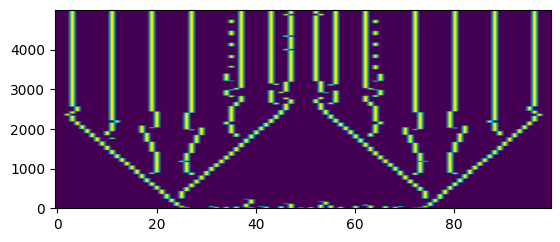

In [28]:
if __name__ == "__main__":
    main()
    #make_gif("Path to folder with graphics")
